# Week1授業課題1 曽呂利新左衛門問題

## 目的
・基礎的なプログラミング力を確認する  
・見やすいコードを書けるようにする  

## 2.曽呂利新左衛門問題
曽呂利新左衛門の逸話を題材にプログラミングを進める。
>秀吉から褒美を下される際、何を希望するか尋ねられた新左衛門は、今日は米1粒、翌日には倍の2粒、その翌日には更に倍の4粒と、日ごとに倍の量の米を100日間もらう事を希望した。米粒なら大した事はないと思った秀吉は簡単に承諾したが、日ごとに倍ずつ増やして行くと100日後には膨大な量になる事に途中で気づき、他の褒美に変えてもらった。  

[曽呂利新左衛門 - Wikipedia](https://ja.wikipedia.org/wiki/曽呂利新左衛門)  
（最終閲覧日：2019年7月13日）

### 【問題1】100日後の米粒の数
100日後には合計で米粒をいくつもらっているのかを計算するコードを作成し、答えを出力する。また、1日目から100日目までの「その日にもらう米の数」と「その日までに累計で貰う米の数」の推移を折れ線グラフで表現する。（縦軸が米の数、横軸が日数）

100日後には合計で米粒をいくつもらっているのか:1267650600228229401496703205375粒
1粒0.２g換算で2.535301200456459e+22トンとなる。


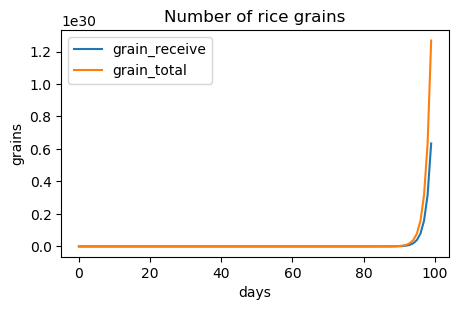

In [1]:
# coding:utf-8
# 【問題1】100日後の米粒の数
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline


# 定数の設定
GRAIN_START = 1
TERM = 100  # お米をもらう期間
MAG = 2 # 倍率

# 「その日にもらう米の数」は、（初日の米の数）*（倍率）*（何日目であるか）で求まる
grain_receive = [GRAIN_START * MAG ** i for i in range(TERM)]
# 「その日までに累計で貰う米の数」は、「その日にもらう米の数」のリストを（何日目であるか）でスライス、合計すると求まる
grain_total = [sum(grain_receive[:j + 1]) for j in range(TERM)]    

print("100日後には合計で米粒をいくつもらっているのか:{}粒".format(grain_total[-1]))
print("1粒0.２g換算で{}トンとなる。".format(grain_total[-1]/(5*10000*1000)))

# 折れ線グラフでプロット
plt.figure(figsize=(5, 3), dpi=100)
plt.title("Number of rice grains") 
plt.xlabel("days")
plt.ylabel("grains")
plt.plot(grain_receive, label="grain_receive") 
plt.plot(grain_total, label="grain_total") 
plt.legend()

plt.show()

### 【問題2】100日後以外の米粒の数
この逸話は30日だったり81日だったりと日数が曖昧である。どの話にも対応できるように日数を引数とした関数を作成する。関数を作成した上で、コースを受講する日数の間でいくつ米粒をもらえるかを答える。前の問題同様に折れ線グラフも出力する。

In [2]:
# 【問題2】100日後以外の米粒の数

def compute_sorori_shinzaemon(term=100):
    """
    曽呂利新左衛門の米の逸話を検証する関数。日にちごとの米の粒の数を計算する。

    Parameteres
    --------------
    term: int
        米を貰う日数 (default : 100)

    Returns
    --------------
    grain_receive: list
        ある日に貰う米の数のリスト（リストの長さはtermに等しくなる）
   grain_total  : list
        ある日までに累計で貰う米の数のリスト（リストの長さはtermに等しくなる）
    """
    grain_receive = [1* 2** i for i in range(term)]
    grain_total = [sum(grain_receive[:j + 1]) for j in range(term)] 
    
    return grain_receive, grain_total 

def plot_sorori_shinzaemon(grain_receive, grain_total
                           , plot_title="Number of rice grains", plot_xlabel="days", plot_ylabel="grains"
                           , plot_figsize=(5, 3), plot_dpi=100
                          ):
    """
    ２つのリストを折れ線グラフにプロットする。
    
    Parameteres
    --------------
    day: int
        米を貰う日数 (default : 100)
        
    grain_receive: list
        ある日に貰う米の数のリスト

    grain_total: list
        ある日までに累計で貰う米の数のリスト
    
    plot_title: str
        グラフタイトル(default: "Number of rice grains")
        
    plot_xlabel: str
        x軸ラベル(default: "days")

    plot_ylabel: str
        y軸ラベル(default: "grains")

    plot_figsize: tuple
        グラフのサイズ(default: (5, 3))
        
    plot_dpi: int
        グラフの解像度(default: 100)
    """
    plt.figure(figsize=plot_figsize, dpi=plot_dpi)
    plt.title(plot_title) 
    plt.xlabel(plot_xlabel)
    plt.ylabel(plot_ylabel)
    plt.plot(grain_receive, label="grain_receive") 
    plt.plot(grain_total, label="grain_total") 
    plt.legend()
    plt.show()



#### テスト
0日目、1日目、5日目でテストする。

In [3]:
# テスト
print("0日目 正:([], []) テスト結果:{}".format(compute_sorori_shinzaemon(0)))
print("1日目 正:([1], [1]) テスト結果:{}".format(compute_sorori_shinzaemon(1)))
print("5日目 正:([1, 2, 4, 8, 16],[1, 3, 7, 15, 31]) テスト結果:{}".format(compute_sorori_shinzaemon(5)))

0日目 正:([], []) テスト結果:([], [])
1日目 正:([1], [1]) テスト結果:([1], [1])
5日目 正:([1, 2, 4, 8, 16],[1, 3, 7, 15, 31]) テスト結果:([1, 2, 4, 8, 16], [1, 3, 7, 15, 31])


#### コースを受講する日数の間でいくつ米粒をもらえるか
コースの期間を2019年7月1日から2019年10月31日の122日間として計算する。

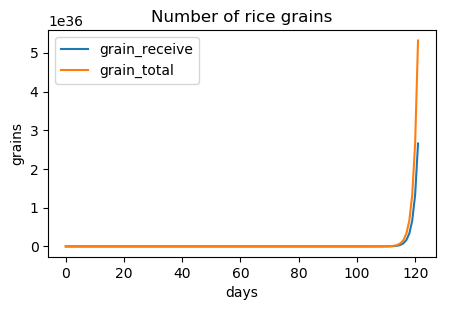

コースを受講する日数の間でいくつ米粒をもらえるか:5316911983139663491615228241121378303粒
1粒0.２g換算で1.0633823966279327e+29トンとなる。


In [4]:
grain_receive, grain_total=compute_sorori_shinzaemon(122)
plot_sorori_shinzaemon(grain_receive, grain_total)
print("コースを受講する日数の間でいくつ米粒をもらえるか:{}粒".format(grain_total[-1]))
print("1粒0.２g換算で{}トンとなる。".format(grain_total[-1]/(5*10000*1000)))

### 【問題3】何人が何日生活できる米か
この米があれば何人が何日生活できるか計算する関数を作成する。コースを受講する期間に貰える米粒で、このクラスにいる人数であれば、何日間生活できるかを出力してみる。  
関数の最低限の入力は 米粒の数(int) と 人数(int) 、出力は 生活できる日数(int) である。関数名やコメントなどは分かりやすく考えて作成する。  
ここでは1日に必要な米粒の数は自分なりに調べて、計算式に落とし込む。どう調べ、何を根拠にしたかもコメントを残しておく。  

In [5]:
# 【問題3】何人が何日生活できる米か

def compute_how_many_days_can_people_live(grains, number_of_men, number_of_women):
    """
    入力された米があれば何人が何日生活できるか計算する。
    米1粒の重さを0.２グラムとする。
    米を水稲穀粒、精白米、うるち米とし、100g当たりのカロリーを358kcalとする。
    参考　食品栄養データベース（食品番号： 01083　食品群名/食品名： 穀類/こめ/［水稲穀粒］/精白米/うるち米）
    https://fooddb.mext.go.jp/details/details.pl?ITEM_NO=1_01083_7

    クラスに所属する全員の身体活動量が低い（1日のうち座っていることがほとんどである）ものとする。
    年齢の範囲は12~69歳に収まるものとする。
    以上の条件から、1日に必要なカロリーを男性2400kcal、女性2000kcalとして計算する。
    参考　一日に必要なエネルギー量と摂取の目安
    http://www.maff.go.jp/j/syokuiku/zissen_navi/balance/required.html
    
    Parameteres
    --------------
    grains: int
        米粒の数(int) 
    
    number_of_men: int
        男性の人数(int)

    number_of_women: int
        女性の人数(int)

    Returns
    --------------
    days_live: int
        生活できる日数
    """
    try:
        # 1粒あたり0.２グラム、100グラムあたり358kcalとして、お米の総カロリーを計算する
        cal_grains = 358/100*grains*0.2
        # 入力された人数が1日生活するために必要なカロリーを計算する
        cal_need = 2400*number_of_men + 2000*number_of_women
        return int(cal_grains/cal_need)
    except ZeroDivisionError:
        print("ZeroDivisionError!!")


#### テスト

In [6]:
# 【問題3】何人が何日生活できる米か_test

def compute_how_many_days_can_people_live_test(grains, number_of_men, number_of_women):
    """
    入力された米があれば何人が何日生活できるか計算する。
    米1粒の重さを0.２グラムとする。
    米を水稲穀粒、精白米、うるち米とし、100g当たりのカロリーを358kcalとする。
    参考　食品栄養データベース（食品番号： 01083　食品群名/食品名： 穀類/こめ/［水稲穀粒］/精白米/うるち米）
    https://fooddb.mext.go.jp/details/details.pl?ITEM_NO=1_01083_7

    クラスに所属する全員の身体活動量が低い（1日のうち座っていることがほとんどである）ものとする。
    年齢の範囲は12~69歳に収まるものとする。
    以上の条件から、1日に必要なカロリーを男性2400kcal、女性2000kcalとして計算する。
    参考　一日に必要なエネルギー量と摂取の目安
    http://www.maff.go.jp/j/syokuiku/zissen_navi/balance/required.html
    
    Parameteres
    --------------
    grains: int
        米粒の数(int) 
    
    number_of_men: int
        男性の人数(int)

    number_of_women: int
        女性の人数(int)

    Returns
    --------------
    days_live: int
        生活できる日数
    """
    try:
        print("grains:{0} number_of_men:{1} number_of_women:{2}".format(grains, number_of_men, number_of_women))
        # 1粒あたり0.２グラム、100グラムあたり358kcalとして、お米の総カロリーを計算する
        cal_grains = 358/100*grains*0.2
        print("cal_grains:{}".format(cal_grains))
        # 入力された人数が1日生活するために必要なカロリーを計算する
        cal_need = 2400*number_of_men + 2000*number_of_women
        print("cal_need:{}".format(cal_need))
        return int(cal_grains/cal_need)
    except ZeroDivisionError:
        print("ZeroDivisionError!!")

# 米０粒、男性０人、女性０人
print("入力:米０粒、男性０人、女性０人")
print("生活できる日数:{}".format(compute_how_many_days_can_people_live_test(0, 0, 0)))
print("-"*70)
# 米1粒、男性０人、女性０人
print("入力:米1粒、男性０人、女性０人")
print("生活できる日数:{}".format(compute_how_many_days_can_people_live_test(1, 0, 0)))
print("-"*70)
# 米０粒、男性1人、女性０人
print("入力:米０粒、男性1人、女性０人")
print("生活できる日数:{}".format(compute_how_many_days_can_people_live_test(0, 1, 0)))
print("-"*70)
# 米０粒、男性０人、女性1人
print("入力:米０粒、男性０人、女性1人")
print("生活できる日数:{}".format(compute_how_many_days_can_people_live_test(0, 0, 1)))
print("-"*70)
# 米1粒、男性1人、女性０人
print("入力:米1粒、男性1人、女性０人")
print("生活できる日数:{}".format(compute_how_many_days_can_people_live_test(1, 1, 0)))
print("-"*70)
# 米1粒、男性0人、女性1人
print("入力:米1粒、男性0人、女性1人")
print("生活できる日数:{}".format(compute_how_many_days_can_people_live_test(1, 0, 1)))
print("-"*70)
# 米0粒、男性1人、女性1人
print("入力:米0粒、男性1人、女性1人")
print("生活できる日数:{}".format(compute_how_many_days_can_people_live_test(0, 1, 1)))
print("-"*70)
# 米1粒、男性1人、女性1人
print("入力:米1粒、男性1人、女性1人")
print("生活できる日数:{}".format(compute_how_many_days_can_people_live_test(1, 1, 1)))
print("-"*70)

# 男性1人が1日に必要な米の数を計算し、入力する
# 男性が1日に必要な米の数 = 必要なカロリー(2400kcal)/米100グラム当たりのカロリー(358kcal)*米100グラム当たりの米の数(100g/0.2g)
grains_man_need = 2400/358*(100/0.2)
print("男性1人が1日に必要なコメの数:{}".format(grains_man_need))
# 米3351粒、男性1人、女性０人
print("入力:米3351粒、男性1人、女性０人")
print("生活できる日数:{}".format(compute_how_many_days_can_people_live_test(3351, 1, 0)))
print("-"*70)
# 米3352粒、男性1人、女性０人
print("入力:米3352粒、男性1人、女性０人")
print("生活できる日数:{}".format(compute_how_many_days_can_people_live_test(3352, 1, 0)))
print("-"*70)
# 米3352粒、男性1人、女性1人
print("入力:米3352粒、男性1人、女性1人")
print("生活できる日数:{}".format(compute_how_many_days_can_people_live_test(3352, 1, 1)))
print("-"*70)

# 女性1人が1日に必要な米の数を計算し、入力する
# 女性が1日に必要な米の数 = 必要なカロリー(2000kcal)/米100グラム当たりのカロリー(358kcal)*米100グラム当たりの米の数(100g/0.2g)
grains_woman_need = 2000/358*(100/0.2)
print("女性1人が1日に必要なコメの数:{}".format(grains_woman_need))
# 米2793粒、男性0人、女性1人
print("入力:米2793粒、男性0人、女性1人")
print("生活できる日数:{}".format(compute_how_many_days_can_people_live_test(2793, 0, 1)))
print("-"*70)
# 米2794粒、男性0人、女性1人
print("入力:米2794粒、男性0人、女性1人")
print("生活できる日数:{}".format(compute_how_many_days_can_people_live_test(2794, 0, 1)))
print("-"*70)

# 米6146粒（男女1人ずつに必要な米）、男性1人、女性1人
print("入力:米6146粒、男性1人、女性1人")
print("生活できる日数:{}".format(compute_how_many_days_can_people_live_test(6146, 1, 1)))


入力:米０粒、男性０人、女性０人
grains:0 number_of_men:0 number_of_women:0
cal_grains:0.0
cal_need:0
ZeroDivisionError!!
生活できる日数:None
----------------------------------------------------------------------
入力:米1粒、男性０人、女性０人
grains:1 number_of_men:0 number_of_women:0
cal_grains:0.7160000000000001
cal_need:0
ZeroDivisionError!!
生活できる日数:None
----------------------------------------------------------------------
入力:米０粒、男性1人、女性０人
grains:0 number_of_men:1 number_of_women:0
cal_grains:0.0
cal_need:2400
生活できる日数:0
----------------------------------------------------------------------
入力:米０粒、男性０人、女性1人
grains:0 number_of_men:0 number_of_women:1
cal_grains:0.0
cal_need:2000
生活できる日数:0
----------------------------------------------------------------------
入力:米1粒、男性1人、女性０人
grains:1 number_of_men:1 number_of_women:0
cal_grains:0.7160000000000001
cal_need:2400
生活できる日数:0
----------------------------------------------------------------------
入力:米1粒、男性0人、女性1人
grains:1 number_of_men:0 number_of_women:1
cal_grains:0.7160000

テストの結果は問題無いようである。

#### 問題の解答

In [7]:
print("コースを受講する期間に貰える米粒で、このクラスにいる人数（男性10人、女性2人）であれば、{}日間生活できる。"
      .format(compute_how_many_days_can_people_live(grain_total[-1], 10, 2)))
print("年数に換算すると{}年間生活できる。"
      .format(compute_how_many_days_can_people_live(grain_total[-1], 10, 2)/365))

コースを受講する期間に貰える米粒で、このクラスにいる人数（男性10人、女性2人）であれば、135961034997428561460450536980480日間生活できる。
年数に換算すると3.724959862943248e+29年間生活できる。
